In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # For missing values visualization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = [feature for feature in df.columns if feature not in continuous_features and feature != "target"]

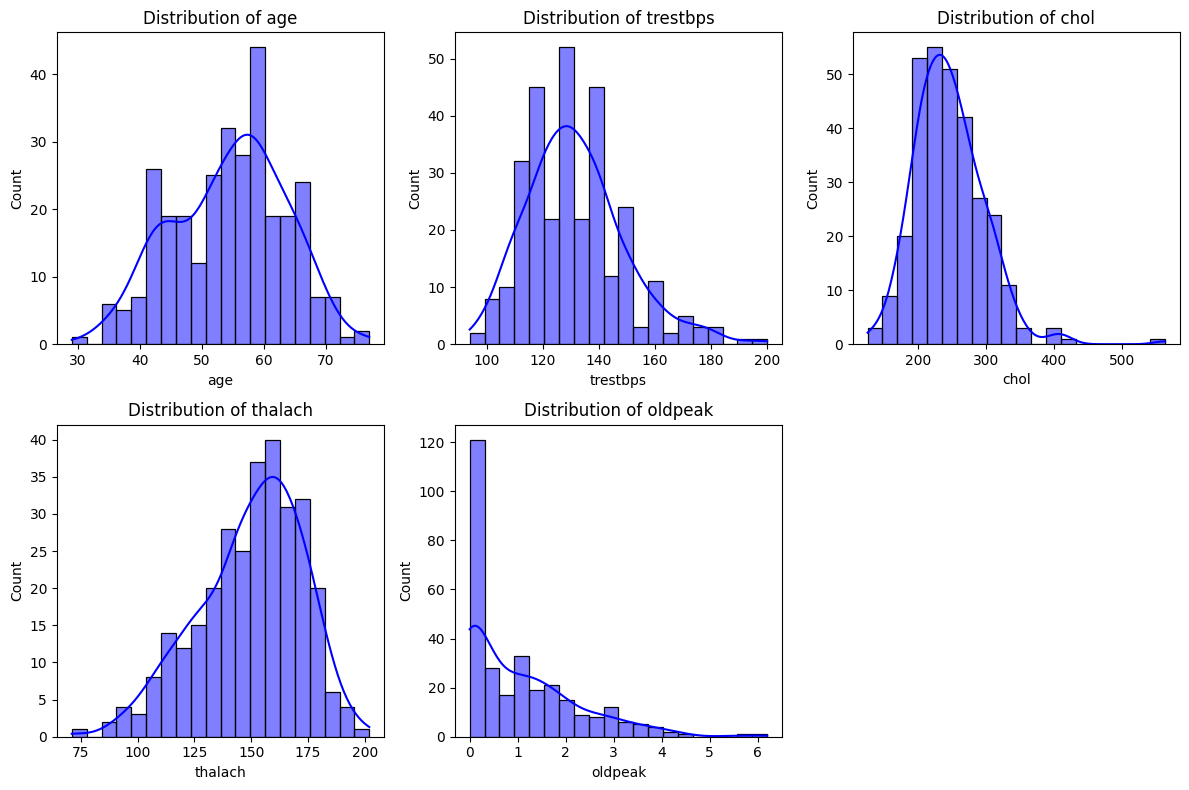

In [8]:
plt.figure(figsize=(12, 8))

# Histograms for numerical features
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=20, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

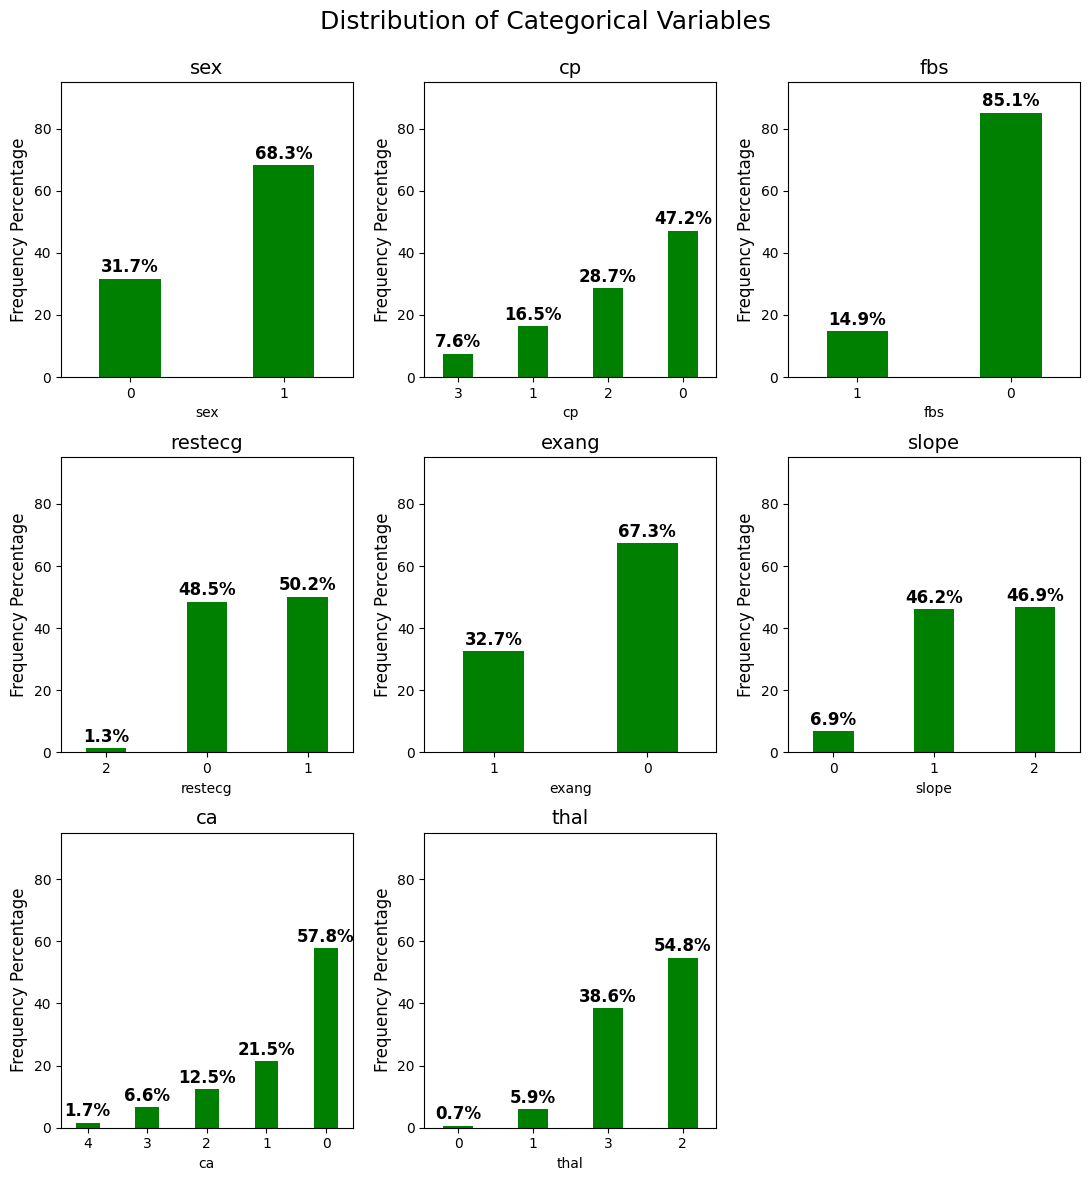

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(11, 12))  # Adjust figure size

ax = ax.flatten()

for i, col in enumerate(categorical_features):
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    value_counts.plot(kind='bar', ax=ax[i], width=0.4, color='green')

    for index, value in enumerate(value_counts):
        ax[i].text(index, value + 2, f'{round(value, 1)}%', fontsize=12, weight='bold', ha='center')

    ax[i].set_ylim([0, 95])
    ax[i].set_ylabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=14)
    ax[i].set_xticklabels(value_counts.index, rotation=0, fontsize=10)

for j in range(len(categorical_features), 9):
    ax[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



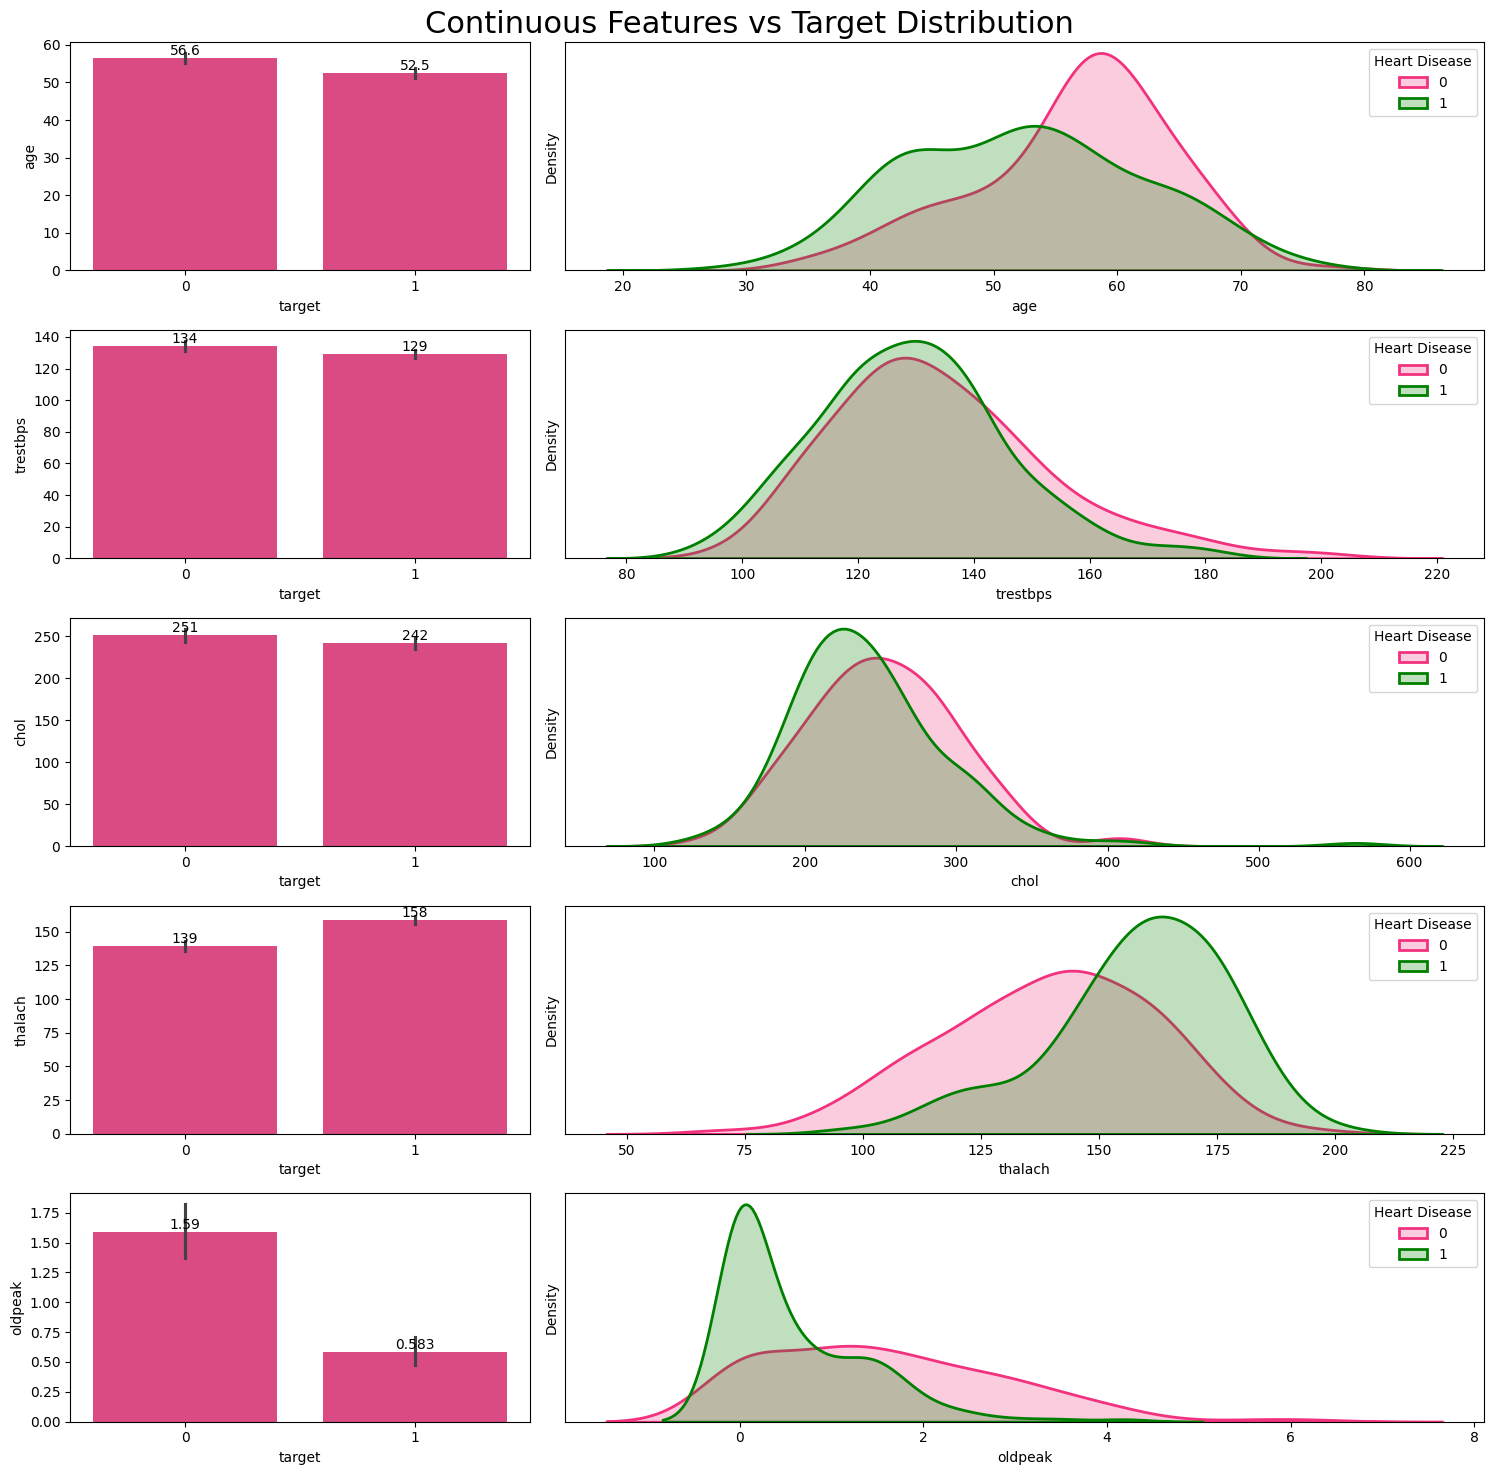

In [10]:
sns.set_palette(['#f2327e', 'green'])

fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g')

plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

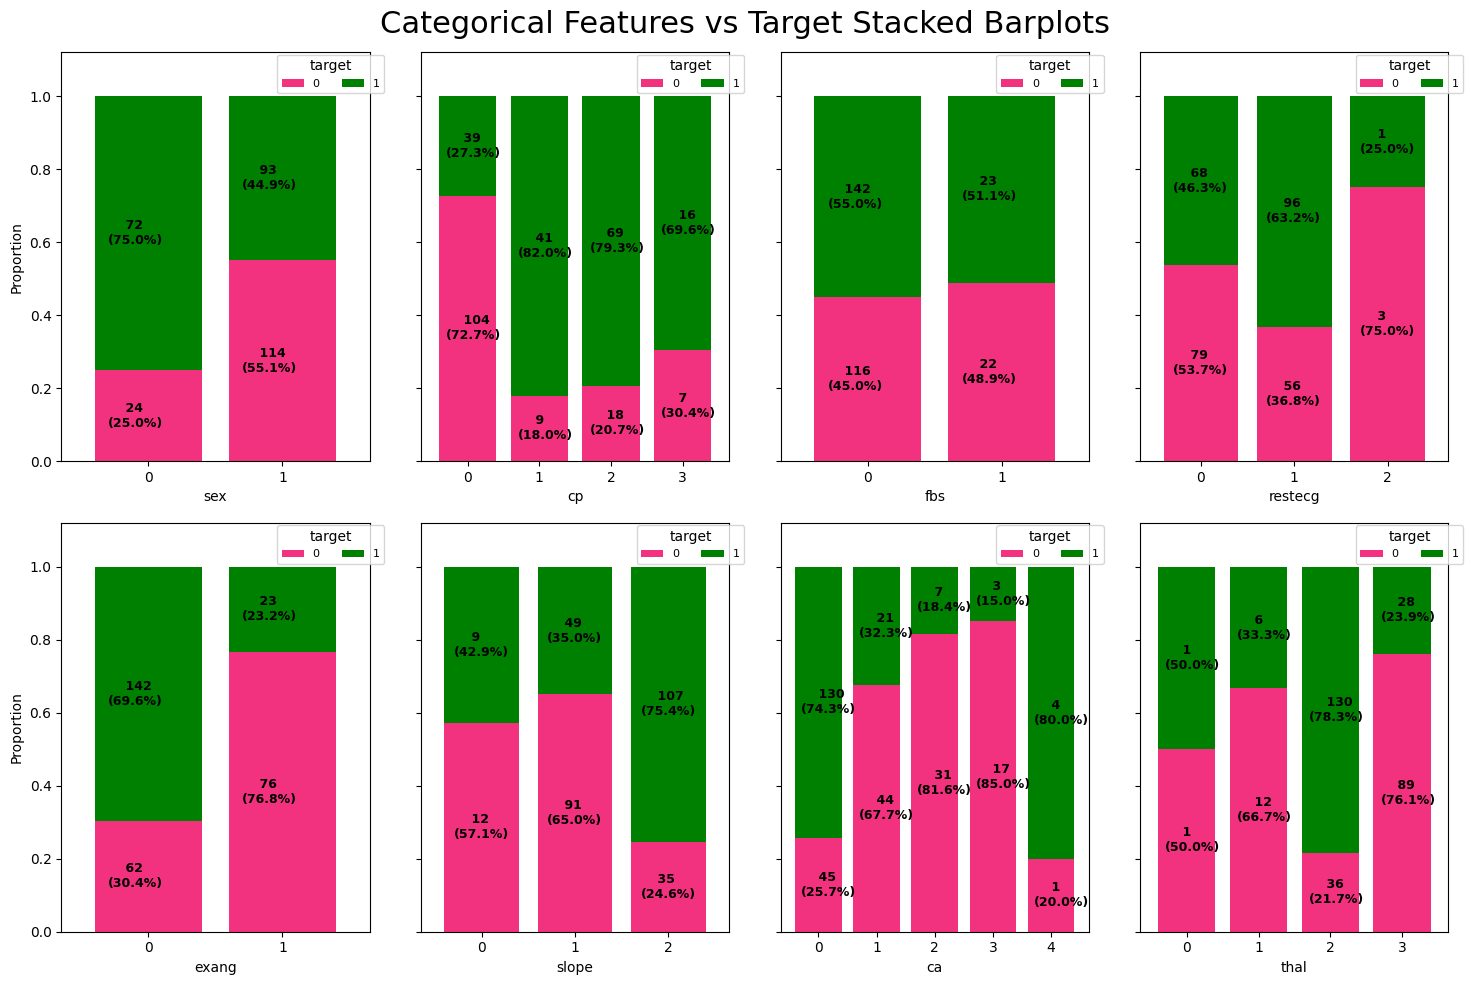

In [11]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):

    cross_tab = pd.crosstab(index=df[col], columns=df['target'])

    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    cmp = ListedColormap(['#f2327e', 'green'])

    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    ax[x,y].set_ylim([0,1.12])
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


In [12]:
print("\n🛠 Checking Missing Values:\n")
print(df.isnull().sum())


🛠 Checking Missing Values:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


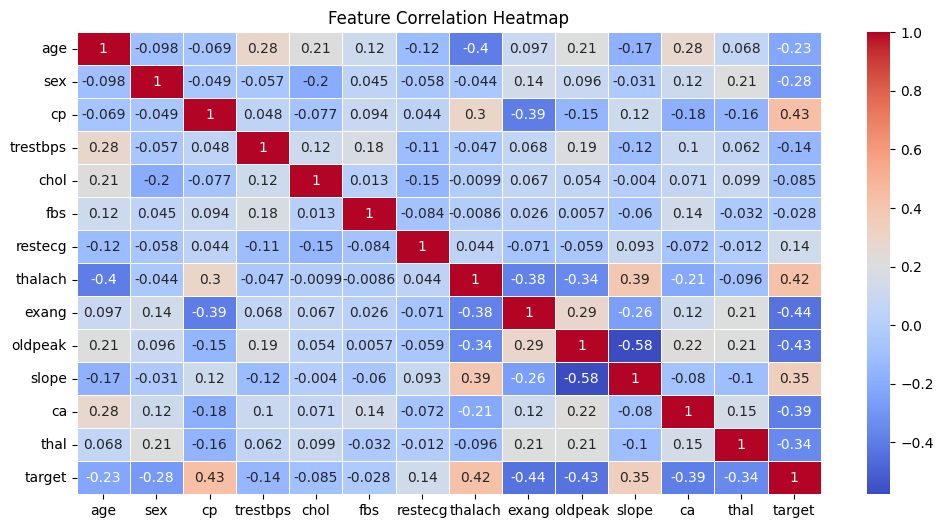

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
X = df.drop(columns=["target"])
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Model:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc


Logistic Regression Model:
Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



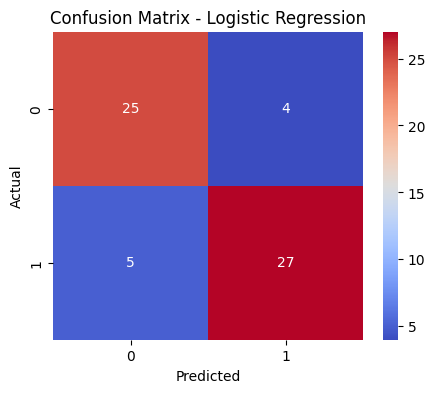


Decision Tree Model:
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



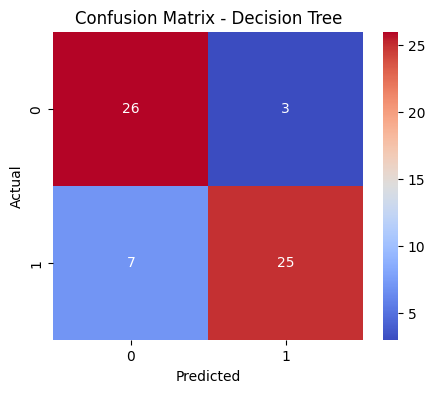


Random Forest Model:
Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



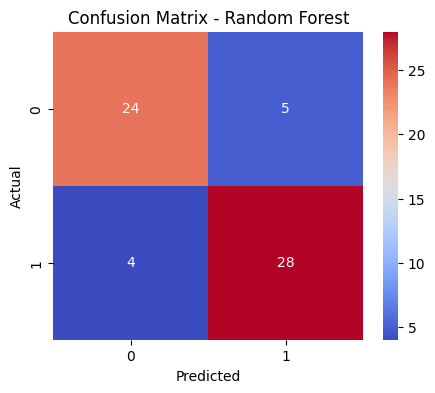


SVM Model:
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



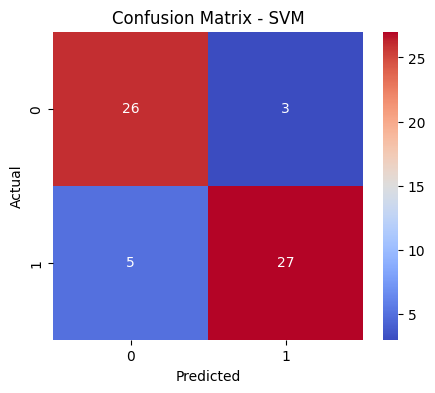


KNN Model:
Accuracy: 0.9180327868852459
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



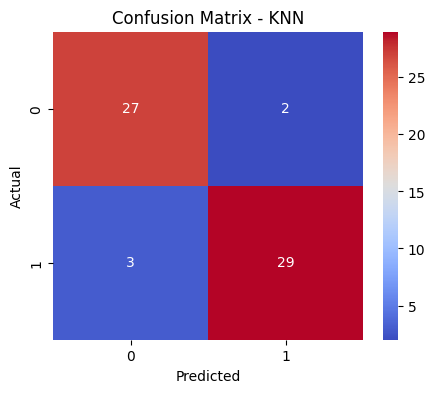

In [16]:
# Train & Evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg_acc = train_and_evaluate_model(log_reg, "Logistic Regression")

# Train & Evaluate Decision Tree
dt = DecisionTreeClassifier()
dt_acc = train_and_evaluate_model(dt, "Decision Tree")

# Train & Evaluate Random Forest
rf = RandomForestClassifier()
rf_acc = train_and_evaluate_model(rf, "Random Forest")

# Train & Evaluate SVM
svm = SVC()
svm_acc = train_and_evaluate_model(svm, "SVM")

# Train & Evaluate KNN
knn = KNeighborsClassifier()
knn_acc = train_and_evaluate_model(knn, "KNN")

In [17]:
# Create a dictionary to store model names and their corresponding accuracies
accuracy_results = {
    "Logistic Regression": log_reg_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "SVM": svm_acc,
    "KNN": knn_acc
}

best_model = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_model]

print(f"\n Best Model: {best_model} with Accuracy: {best_accuracy:.2%}")


 Best Model: KNN with Accuracy: 91.80%


<ipython-input-18-19c34a65a0fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="viridis")


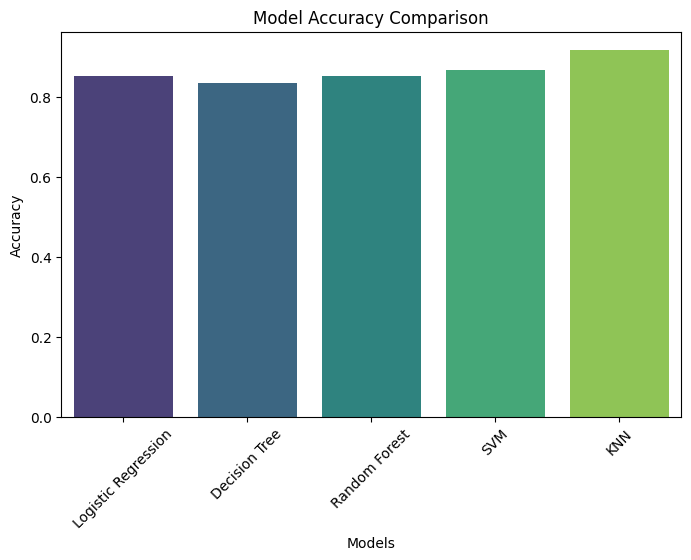

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Map model names to actual trained model objects
model_objects = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "KNN": knn
}

# Get the best trained model object
final_model = model_objects[best_model]

# Ask user to input values
print("\n🩺 Enter patient data to predict heart disease risk:\n")
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
            'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
            'ca', 'thal']

user_values = []
for feature in features:
    val = float(input(f"Enter value for {feature}: "))
    user_values.append(val)

# Convert input to DataFrame
import pandas as pd
user_df = pd.DataFrame([user_values], columns=features)

# Standardize user input using the same scaler
user_scaled = scaler.transform(user_df)

# Make prediction
# Make prediction
prediction = final_model.predict(user_scaled)

# Get prediction probabilities
if hasattr(final_model, "predict_proba"):
    probas = final_model.predict_proba(user_scaled)
    low_risk_prob = probas[0][0] * 100  # Class 0 = Low Risk
    high_risk_prob = probas[0][1] * 100  # Class 1 = High Risk
else:
    # For models like SVM without probability, set dummy values
    low_risk_prob = high_risk_prob = None

# Show result
print("\n Prediction Result:")

if prediction[0] == 1:
    if high_risk_prob is not None:
        print(f"High Risk of Heart Disease ({high_risk_prob:.2f}% chance)")
    else:
        print("High Risk of Heart Disease")
else:
    if low_risk_prob is not None:
        print(f"Low Risk of Heart Disease ({low_risk_prob:.2f}% chance)")
    else:
        print("Low Risk of Heart Disease")



🩺 Enter patient data to predict heart disease risk:

Enter value for age: 45
Enter value for sex: 0
Enter value for cp: 0
Enter value for trestbps: 140
Enter value for chol: 241
Enter value for fbs: 0
Enter value for restecg: 1
Enter value for thalach: 123
Enter value for exang: 1
Enter value for oldpeak: 0.2
Enter value for slope: 1
Enter value for ca: 0
Enter value for thal: 3

 Prediction Result:
Low Risk of Heart Disease (80.00% chance)


In [20]:
import pickle

# Save KNN model
with open("knn_model.pkl", "wb") as model_file:
    pickle.dump(final_model, model_file)

# Save scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Model and Scaler saved successfully as .pkl files.")


✅ Model and Scaler saved successfully as .pkl files.


In [22]:
# Load model
with open("knn_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load scaler
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Example prediction
# user_input = [[...]]  # input values in the correct format
# scaled = loaded_scaler.transform(user_input)
# prediction = loaded_model.predict(scaled)
